In [20]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Load the data
data = np.loadtxt("kmeans_data.txt")

# Number of clusters (given)
K = 2

In [22]:
# Function to get the Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [23]:
# Function to assign each point to the closest centroid
def assign_clusters(data, centroids):
    clusters = np.zeros(data.shape[0])
    for i, point in enumerate(data):
        distances = np.array([euclidean_distance(point, centroid) for centroid in centroids])
        clusters[i] = np.argmin(distances)
    return clusters

# Function to update the centroids based on the previous clusters
def update_centroids(data, clusters, K):
    new_centroids = np.zeros((K, data.shape[1]))
    for i in range(K):
        points = data[clusters == i]
        mean = np.mean(points, axis=0)
        new_centroids[i] = mean
    return new_centroids

# Function to run the K-means algorithm
def kmeans(data, K, max_iters = 100):
    centroids = data[:K]
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, K)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

In [24]:
# Function to plot the data
def plot_data(data, title):
    plt.scatter(data[:, 0], data[:, 1])
    plt.title(title)
    plt.show()

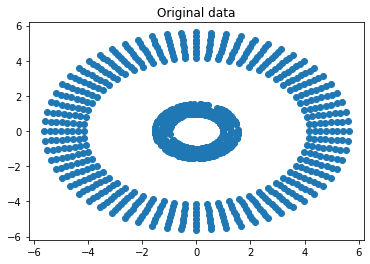

In [25]:
# Plot the original data
plot_data(data, "Original data")

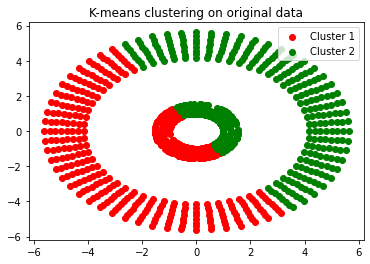

In [26]:
# Run the K-means algorithm on the original data
centroids, clusters = kmeans(data, K)

# Plot the clustered data
for i in range(K):
    cluster = data[clusters == i]
    colors = ["red", "green"]  # Use red for cluster 1, green for cluster 2
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i + 1}')

plt.title("K-means clustering on original data")
plt.legend()
plt.show()

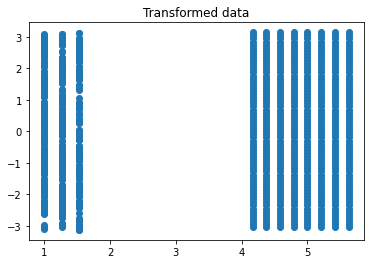

In [27]:
# Transform the original data
def transform(data):
    r = np.sqrt(data[:, 0] ** 2 + data[:, 1] ** 2)
    theta = np.arctan2(data[:, 1], data[:, 0])
    return np.array([r, theta]).T

# Apply the feature transformation to the original data
data_transformed = transform(data)

# Plot the transformed data
plot_data(data_transformed, "Transformed data")

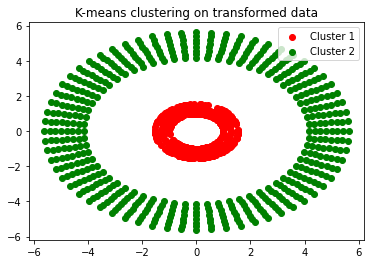

In [28]:
# Run the K-means algorithm on the transformed data
centroids, clusters = kmeans(data_transformed, K)

# Plot the clustered data
for i in range(K):
    cluster = data[clusters == i]
    colors = ["red", "green"]  # Use red for cluster 1, green for cluster 2
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label=f'Cluster {i + 1}')

plt.title("K-means clustering on transformed data")
plt.legend()
plt.show()